# Hysteresis loop of a multigrain material
This notebook extends the calculation of hysteresis loops to multigrain materials.

First, the function `hysteresis.run` from the quickstart is adapted for this case and then a more involved simulation is presented.

In [1]:
import math

import mammos_entity as me
import mammos_units as u
from mammos_mumag import hysteresis
from mammos_mumag.materials import Materials
from mammos_mumag.parameters import Parameters
from mammos_mumag.simulation import Simulation

In [2]:
u.set_enabled_equivalencies(u.magnetic_flux_field())

## The multigrain material
The mesh `cube40_3plat_grains12_gsize20` describe a cube of side length 40 containing 12 different grains generated as 3 layers of cuboids, with grain size 20.
The space between the different grain represents the boundary interface.
The cube is surrounded by a spherical non-magnetic material further surrounded by a shell.

Hence the total number of regions is 15:
- 12 grains
- 1 boundary interface
- 1 non-magnetic material
- 1 shell.

In [3]:
mesh = "cube40_3plat_grains12_gsize20"

## Simulation using the `hysteresis.run` function

We can assume the intrinsic properties in all grains have the same value (the generalization is trivial):

In [4]:
Ms = me.Ms([1280000] * 12)
A = me.A([7.7e-12] * 12)
Ku = me.Ku([4300000] * 12)

While the `hysteresis.run` function always assume the magnetic parameters to be zero in the non-magnetic material and in the shell, we still need to assign a value to the boundary interface.
In this case we assign zero.

To concatenate a number to an entity, we use the `concat_flat` function from `mammos_entity`.

In [5]:
hysteresis_result = hysteresis.run(
    mesh=mesh,
    Ms=me.concat_flat(Ms, 0),
    A=me.concat_flat(A, 0),
    K1=me.concat_flat(Ku, 0),
    theta=[math.pi / 4] * 12 + [0],
    phi=[i * 2 * math.pi / 12 for i in range(12)] + [0],
    h_start=(10 * u.T).to("A/m"),
    h_final=(-10 * u.T).to("A/m"),
    h_n_steps=20,
)

restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1

We can visualize then the output as in the single grain case.

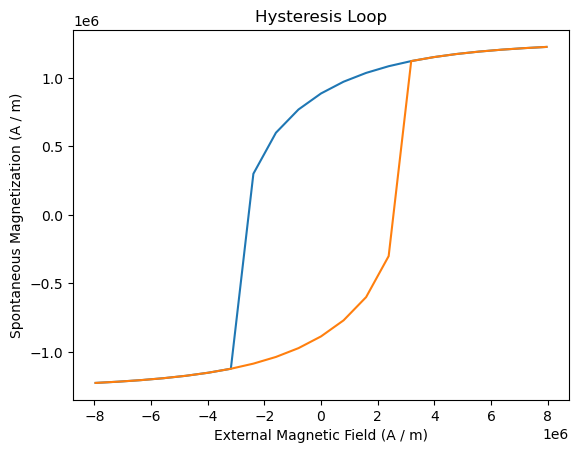

In [6]:
hysteresis_result.plot();

## Simulation using the `Simulation` object

What we have previously defined for 3 domains, now we need to define for all 15 of them.

In [7]:
mat = Materials(
    domains=[
        {  # grain 1
            "theta": math.pi / 4,
            "phi": 0.0,
            "K1": me.Ku(4.3e6, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(1.28e6, unit=u.A / u.m),
            "A": me.A(7.7e-12, unit=u.J / u.m),
        },
        {  # grain 2
            "theta": math.pi / 4,
            "phi": math.pi / 12,
            "K1": me.Ku(4.3e6, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(1.28e6, unit=u.A / u.m),
            "A": me.A(7.7e-12, unit=u.J / u.m),
        },
        {  # grain 3
            "theta": math.pi / 4,
            "phi": 2 * math.pi / 12,
            "K1": me.Ku(4.3e6, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(1.28e6, unit=u.A / u.m),
            "A": me.A(7.7e-12, unit=u.J / u.m),
        },
        {  # grain 4
            "theta": math.pi / 4,
            "phi": 3 * math.pi / 12,
            "K1": me.Ku(4.3e6, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(1.28e6, unit=u.A / u.m),
            "A": me.A(7.7e-12, unit=u.J / u.m),
        },
        {  # grain 5
            "theta": math.pi / 4,
            "phi": 4 * math.pi / 12,
            "K1": me.Ku(4.3e6, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(1.28e6, unit=u.A / u.m),
            "A": me.A(7.7e-12, unit=u.J / u.m),
        },
        {  # grain 6
            "theta": math.pi / 4,
            "phi": 5 * math.pi / 12,
            "K1": me.Ku(4.3e6, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(1.28e6, unit=u.A / u.m),
            "A": me.A(7.7e-12, unit=u.J / u.m),
        },
        {  # grain 7
            "theta": math.pi / 4,
            "phi": 6 * math.pi / 12,
            "K1": me.Ku(4.3e6, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(1.28e6, unit=u.A / u.m),
            "A": me.A(7.7e-12, unit=u.J / u.m),
        },
        {  # grain 8
            "theta": math.pi / 4,
            "phi": 7 * math.pi / 12,
            "K1": me.Ku(4.3e6, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(1.28e6, unit=u.A / u.m),
            "A": me.A(7.7e-12, unit=u.J / u.m),
        },
        {  # grain 9
            "theta": math.pi / 4,
            "phi": 8 * math.pi / 12,
            "K1": me.Ku(4.3e6, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(1.28e6, unit=u.A / u.m),
            "A": me.A(7.7e-12, unit=u.J / u.m),
        },
        {  # grain 10
            "theta": math.pi / 4,
            "phi": 9 * math.pi / 12,
            "K1": me.Ku(4.3e6, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(1.28e6, unit=u.A / u.m),
            "A": me.A(7.7e-12, unit=u.J / u.m),
        },
        {  # grain 11
            "theta": math.pi / 4,
            "phi": 10 * math.pi / 4,
            "K1": me.Ku(4.3e6, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(1.28e6, unit=u.A / u.m),
            "A": me.A(7.7e-12, unit=u.J / u.m),
        },
        {  # grain 12
            "theta": math.pi / 4,
            "phi": 11 * math.pi / 4,
            "K1": me.Ku(4.3e6, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(1.28e6, unit=u.A / u.m),
            "A": me.A(7.7e-12, unit=u.J / u.m),
        },
        {  # grain boundary
            "theta": 0.0,
            "phi": 0.0,
            "K1": me.Ku(0.0, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(0.0, unit=u.A / u.m),
            "A": me.A(0.0, unit=u.J / u.m),
        },
        {  # non-magnetic material
            "theta": 0.0,
            "phi": 0.0,
            "K1": me.Ku(0.0, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(0.0, unit=u.A / u.m),
            "A": me.A(0.0, unit=u.J / u.m),
        },
        {  # shell
            "theta": 0.0,
            "phi": 0.0,
            "K1": me.Ku(0.0, unit=u.J / u.m**3),
            "K2": me.Ku(0.0, unit=u.J / u.m**3),
            "Ms": me.Ms(0.0, unit=u.A / u.m),
            "A": me.A(0.0, unit=u.J / u.m),
        },
    ],
)

We leave the simulation parameters as defined previously.

In [8]:
par = Parameters(
    size=1.0e-9,
    scale=0,
    m_vect=[0, 0, 1],
    h_start=(10 * u.T).to("A/m"),
    h_final=(-10 * u.T).to("A/m"),
    h_step=(-1 * u.T).to("A/m"),
    h_vect=[0.01745, 0, 0.99984],
    m_step=(1 * u.T).to("A/m"),
    m_final=(-2 * u.T).to("A/m"),
    tol_fun=1e-10,
    tol_h_mag_factor=1,
    precond_iter=10,
)

We can now define the `Simulation` object.

In [9]:
sim = Simulation(
    mesh=mesh,
    materials=mat,
    parameters=par,
)

And run the hysteresis loop.

In [10]:
sim.run_loop(outdir="out", name="cube")

restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1 is not a sufficient downhill direction
restart:  d  is not a sufficient downhill direction
restart: -z1

We finally load a `Result` object and  plot the hysteresis loop.

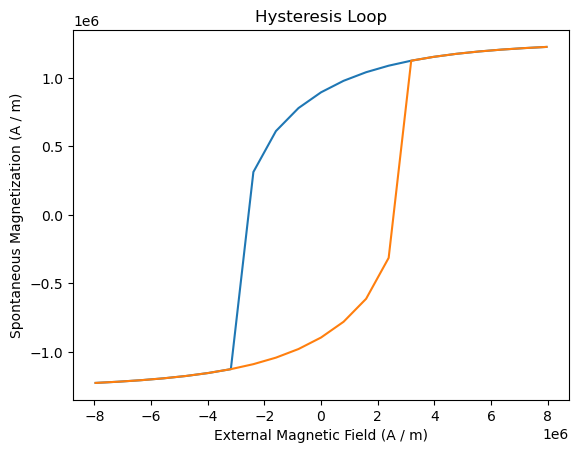

In [11]:
results = hysteresis.read_result(outdir="out", name="cube")
results.plot();